# Polynominální regrese

## Úkol

- Načtěte dataset s velikostmi a cenami
- Prozkoumejte a zobrazte data
- Vytvořte lineární model a zjistětě jaho R2
- Vytvořte polynomiální modely s různým stupni, zjistěte jejich R2
- Vyberte nejlepší model 

# Načtení dat

In [45]:
import pandas as pd 

In [46]:
data = pd.read_csv ("..\dataset\prices.csv",  sep=';')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nazhm\AppData\Local\Temp\ipykernel_28684\3190195622.py:1: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv ("..\dataset\prices.csv",  sep=';')


# Lineární model
- standardizujte data
- vytvořte a natrénujte lineární model
- zobrazte parametry modelu
- vizualizujte lineární model
- zobrazte skóre modelu

In [47]:
# 1. Načtení dat
data = pd.read_csv("../dataset/prices.csv", sep=';')
print(data.head())

        Size       Price
0   51.00000   901.18810
1   70.36735   972.23867
2   89.73469  1001.99394
3  109.10204  1024.90830
4  128.46939  1053.72491


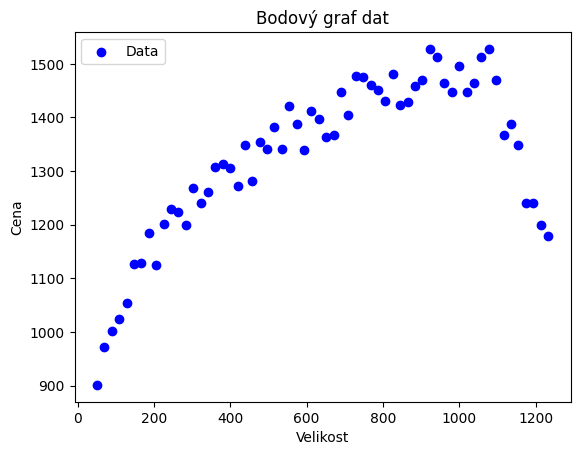

In [48]:
# 2. Prozkoumáme a zobrazim data
plt.scatter(data['Size'], data['Price'], label="Data", color='blue')
plt.xlabel("Velikost")
plt.ylabel("Cena")
plt.title("Bodový graf dat")
plt.legend()
plt.show()

In [49]:
# 3. Lineární model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['Size']])
y = data['Price']

lin_model = LinearRegression()
lin_model.fit(X_scaled, y)

print(f"Koeficienty lineárního modelu: {lin_model.coef_}, intercept: {lin_model.intercept_}")


Koeficienty lineárního modelu: [100.2024297], intercept: 1327.8396854838713


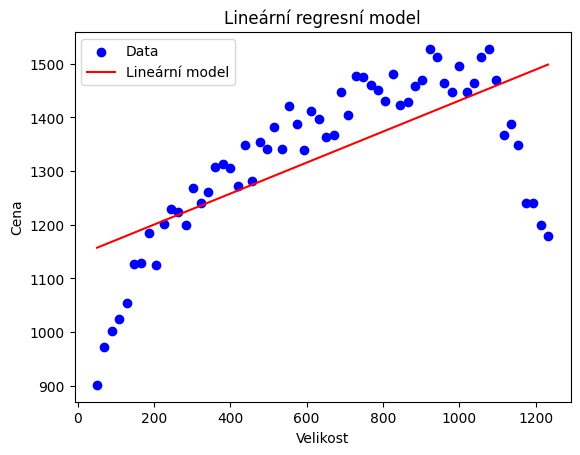

In [50]:
# Vizualizace lineární regrese
from matplotlib import pyplot as plt


plt.scatter(data['Size'], data['Price'], label="Data", color='blue')
plt.plot(data['Size'], lin_model.predict(X_scaled), label="Lineární model", color='red')
plt.xlabel("Velikost")
plt.ylabel("Cena")
plt.legend()
plt.title("Lineární regresní model")
plt.show()

# Vytvořte polynominální regresní model
- vytvořte model polynominální 1D model se stupni 2 - 8
- modely zobrazte
- zobrazte jejich parametry
- zobrazte jejich skóre
- Který model byste vybrali?

In [51]:
# 4. Polynomiální regrese
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


for degree in range(2, 9):
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X_scaled, y)
    y_pred = poly_model.predict(X_scaled)
    
    r2 = r2_score(y, y_pred)
    print(f"Stupeň {degree}: R2 skóre = {r2}")

Stupeň 2: R2 skóre = 0.8807971039830395
Stupeň 3: R2 skóre = 0.8961885817191735
Stupeň 4: R2 skóre = 0.9535593659439079
Stupeň 5: R2 skóre = 0.954935093416025
Stupeň 6: R2 skóre = 0.9560221107940496
Stupeň 7: R2 skóre = 0.95692981937611
Stupeň 8: R2 skóre = 0.9589246162068334


In [52]:
# Výběr nejlepšího modelu
best_degree = max(range(2, 9), key=lambda d: r2_score(y, make_pipeline(PolynomialFeatures(d), LinearRegression()).fit(X_scaled, y).predict(X_scaled)))
print(f"Nejlepší model má stupeň: {best_degree}")

Nejlepší model má stupeň: 8
